**CASE STUDY**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

  
The data given in this assignment contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
Approved: The Company has approved loan Application
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
Unused offer:  Loan has been cancelled by the client but at different stages of the process.


**Objective of the study**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In [158]:
#Import the necessary libraries in the file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
#import the function to suppress warnings.
import warnings
warnings.filterwarnings('ignore')

In [162]:
#Reading the datasets application_data and previous_application in dataframes df1 and df2
df1=pd.read_csv('application_data.csv')
df2=pd.read_csv('previous_application.csv')

In [163]:
#print the head of both datasets to get some insight
#df1 gives insight on the applicant's attribute
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#df2 gives insight on applicant's previous loan application (if any)
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
#find the shape of the dataframes
df1.shape

(307511, 122)

In [166]:
df2.shape

(1670214, 37)

In [167]:
#setting this option ensures all rows are visible for better analysis. 
pd.set_option('display.max_rows', None) 

**Starting the analysis with null values, first we find out how many columns in these dataset have null values greater than 25%**

In [169]:
df1_high_null=df1.isnull().mean().loc[lambda x: x > 0.25]

In [170]:
df2_high_null=df2.isnull().mean().loc[lambda x: x > 0.25]

In [171]:
len(df1_high_null)

50

In [172]:
len(df2_high_null)

11

In [173]:
#removing these 50 columns from df1
df1 = df1.drop(columns=df1_high_null.index)

In [174]:
#removing these 11 columns from df2
df2 = df2.drop(columns=df2_high_null.index)

**now we check for the columns whose null values are less than 10%**

In [176]:
df1_less_null=df1.isnull().mean().loc[lambda x: x < 0.1]
print(df1_less_null)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [177]:
df2_less_null=df2.isnull().mean().loc[lambda x: x < 0.1]
print(df2_less_null)

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
CHANNEL_TYPE                   0.000000e+00
SELLERPLACE_AREA               0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
NAME_YIELD_GROUP               0.000000e+00
PRODUCT_COMBINATION            2

in df2, the null values are almost negligible for less than 10% so we can ignore it and proceed with df1.

From df1 we can gather that columns AMT_Annuity, CNT_Fam_Members, and Days_Last_Phone_Change have the least amt of null values. Taking into consideration that Amt_Annuity is crucial for our data, we will deal with its missing values first.

In [180]:
#finding more info on this column
df1['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

From this we can gather that it has a large outlier, so to fill the null columns, instead of finding mean, we can take the median. 

In [182]:
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median(), inplace=True)

In [183]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [184]:
#here we can see some columns still have significant amount of null values. Since they are not that crucial for our analysis, we can drop them along with some other columns that do not seem that significant
df1.drop(columns=['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 
                  'AMT_REQ_CREDIT_BUREAU_DAY', 
                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON', 
                  'AMT_REQ_CREDIT_BUREAU_QRT', 
                  'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], inplace=True)

In [185]:
df1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now we can see that there are almost no null values column wise. Now we will move on to rows and remove rows with null values greater than 25%.

In [187]:
df1 = df1.dropna(thresh=int(0.75 * df1.shape[1]))

In [188]:
#lets take a look at some of the columns which will be relevant for our analysis to get a better understanding. 
df1['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [189]:
df1['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [190]:
df1['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [191]:
df1['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [192]:
df1['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In columns CODE_GENDER and ORGANIZATION_TYPE, there are XNA values which we need to deal with.

In [194]:
#since there are only 4 XNA values in this, we can replace it with the majority value which is F and it won't affect the dataset.
df1.loc[df1['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

In [195]:
df1['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [196]:
value_percent = (df1['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100)
print(value_percent)

ORGANIZATION_TYPE
Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant

We can gather that around 18% of values in this column are XNA which can be dropped simply.

In [198]:
df1 = df1[df1['ORGANIZATION_TYPE'] != 'XNA']

In [199]:
df1['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

we have successfully dealt with the XNA values in these columns from df1. Now we can do the same for the columns that may be relevant for our analysis in df2 before going further.

In [201]:
df2['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [202]:
df2['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [203]:
df2['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

we can see that in the column 'NAME_CONTRACT_TYPE', total number of XNA values are very less so it can be dropped.

In [205]:
df2 = df2[df2['NAME_CONTRACT_TYPE'] != 'XNA']

In [206]:
df2['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

similarly we can do the same for column NAME_CASH_LOAN_PURPOSE as there are large amount of XAP and XNA values that can interfere with our analysis. 

In [208]:
df2 = df2[~df2['NAME_CASH_LOAN_PURPOSE'].isin(['XNA', 'XAP'])]

In [209]:
df2['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

**Now we will begin works on our visualisation from df1, but first we need to create bins for some continous variables that will be used.**

In [217]:
df1['INCOME_RANGE'] = pd.cut(
    df1['AMT_INCOME_TOTAL'],
    bins=[0, 60000, 120000, 180000, 240000, 300000, 360000, 420000, 480000, 540000, 10000000000],
    labels=[
        '0-60K', '60K-120K', '120K-180K', '180K-240K', '240K-300K',
        '300K-360K', '360K-420K', '420K-480K', '480K-540K', 'above 540K'
    ]
)

In [219]:
df1['CREDIT_RANGE'] = pd.cut(df1['AMT_CREDIT'],bins = [0, 200000, 400000, 600000, 800000, 1000000, float('inf')], labels=[
    '0-200k',
    '200k-400k',
    '400k-600k',
    '600k-800k',
    '800k-1M',
    'Above 1M'])

In [220]:
df1['INCOME_RANGE'].value_counts(normalize=True)*100

INCOME_RANGE
120K-180K     37.630336
60K-120K      28.271932
180K-240K     16.130516
240K-300K      8.088460
300K-360K      4.816826
0-60K          1.590802
420K-480K      1.194192
360K-420K      1.159687
above 540K     0.703586
480K-540K      0.413664
Name: proportion, dtype: float64

In [221]:
df1['CREDIT_RANGE'].value_counts(normalize=True)*100

CREDIT_RANGE
200k-400k    25.521443
400k-600k    21.825833
Above 1M     17.110539
600k-800k    13.933695
0-200k       11.251423
800k-1M      10.357068
Name: proportion, dtype: float64

# From these observations, we can see that around 83% of the overall loan applicants have income less than 240k and around 17% of the applicants have taken loan amounting more than 1M .

In [227]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,-1134.0,180K-240K,400k-600k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,School,-828.0,240K-300K,Above 1M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,-815.0,60K-120K,0-200k
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,-617.0,120K-180K,200k-400k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,-1106.0,120K-180K,400k-600k


In the next step, we will divide the dataset into two targets: target 1(Client with payment difficulties) and target 0(for other cases or clients who can pay back loan)

In [231]:
target0=df1.loc[df1["TARGET"]==0]
target1=df1.loc[df1["TARGET"]==1]

In [232]:
#finding the imbalance ratio between two applicant types:
round(len(target0)/len(target1),2)

10.55

The imbalance ratio in the dataset for clients that can repay vs clients that have repayment difficulties is **10.55:1**

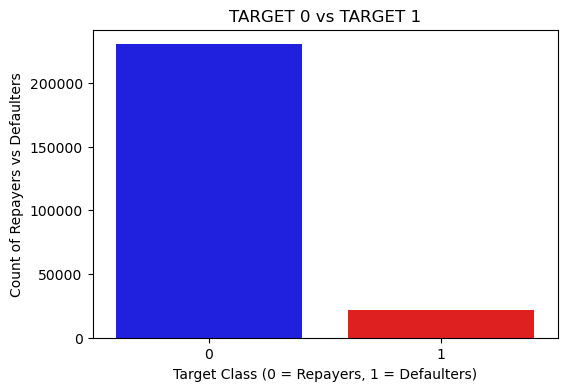

In [234]:
#we can also plot both target variables on a barplot
plt.figure(figsize=(6, 4))
sns.countplot(x=df1["TARGET"], palette=["blue", "red"])

plt.xlabel("Target Class (0 = Repayers, 1 = Defaulters)")
plt.ylabel("Count of Repayers vs Defaulters")
plt.title("TARGET 0 vs TARGET 1")
plt.show()

# PERFORMING UNIVARIATE ANALYSIS ON TARGET 0 AND TARGET 1

Firstly we will create reusable functions containing different chart types for our analysis

In [243]:
def plot_bar(df1, column):
   
    counts = df1[column].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values, palette="dark")
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Bar Plot of {column}")
    
   
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    plt.show()


In [251]:
def plot_barh(df1, column):
  
    counts = df1[column].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(y=counts.index, x=counts.values, palette="bright", orient="h")
    plt.xticks(rotation=45)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title(f"Distribution of {column}")
    
   
    for i, count in enumerate(counts.values):
        plt.text(count, i, str(count), ha='left', va='center')
    plt.show()

In [256]:
def plot_pie(df1, column):

    counts = df1[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("deep"))
    plt.title(f"Distribution of {column}")
    plt.show()

In [259]:
df1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,-1134.0,180K-240K,400k-600k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,School,-828.0,240K-300K,Above 1M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,-815.0,60K-120K,0-200k
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,-617.0,120K-180K,200k-400k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,-1106.0,120K-180K,400k-600k


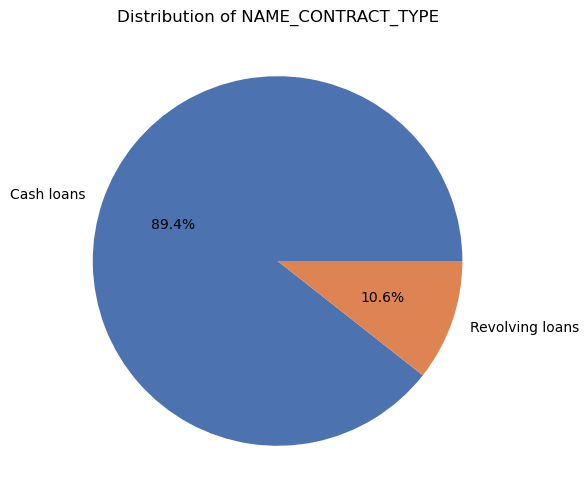

In [261]:
plot_pie(target0, "NAME_CONTRACT_TYPE")

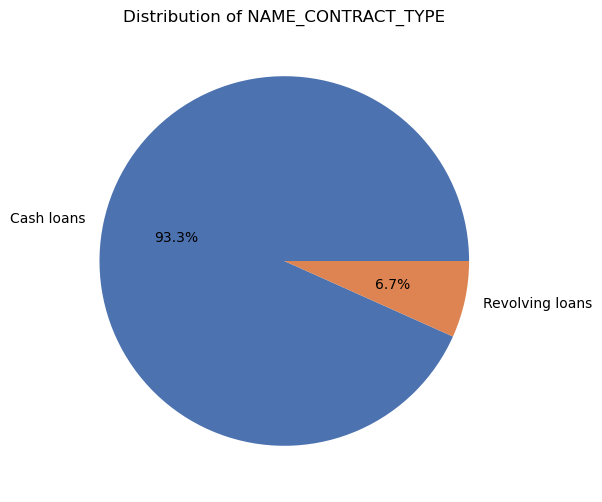

In [264]:

plot_pie(target1, "NAME_CONTRACT_TYPE")

# Most of the applicants filed for cash loans.

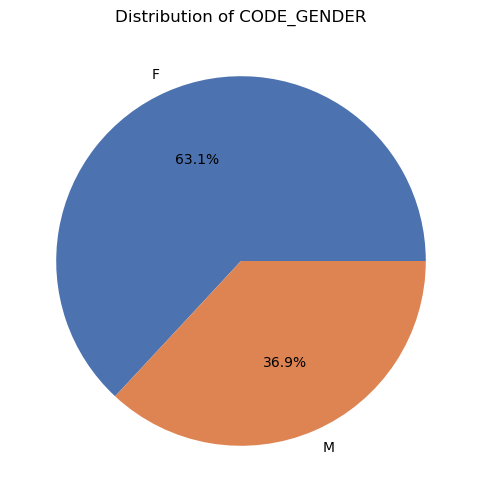

In [273]:
plot_pie(target0, "CODE_GENDER")

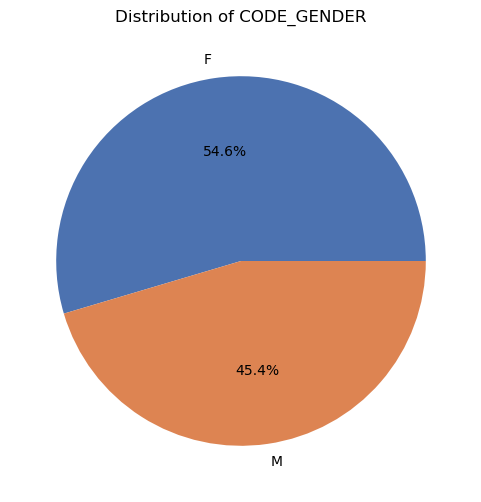

In [276]:
plot_pie(target1, "CODE_GENDER")

# The number of female applicants are higher than the male applicants.
# The female applicants are less likely to repay loan compared to male applicants.



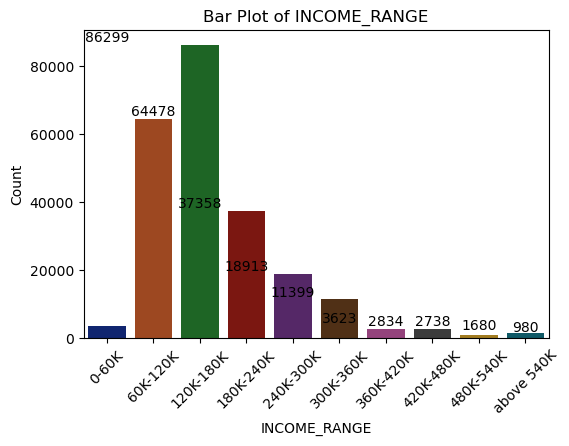

In [280]:
plot_bar(target0, "INCOME_RANGE")

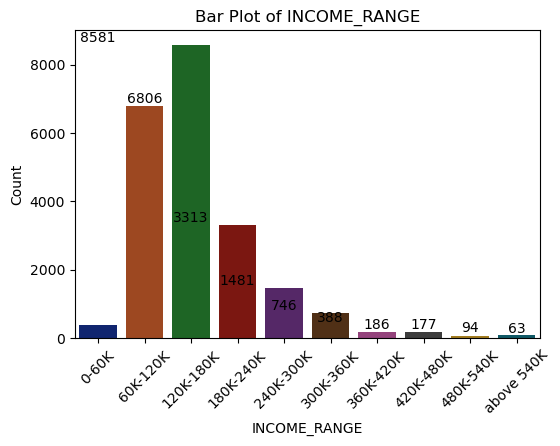

In [283]:
plot_bar(target1, "INCOME_RANGE")

# The maximum number of applicants lie in income range of 120k-180k.

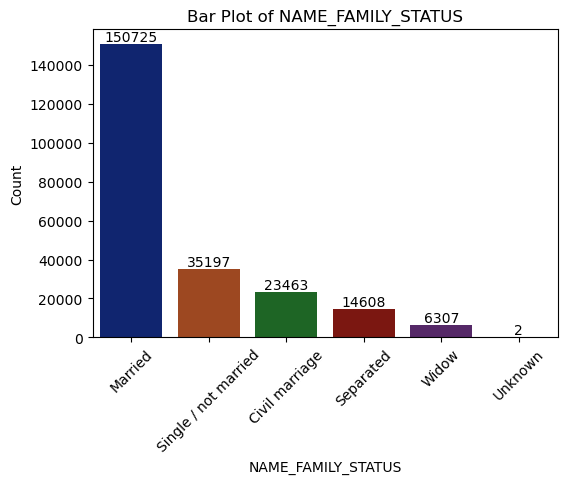

In [289]:
plot_bar(target0, "NAME_FAMILY_STATUS")

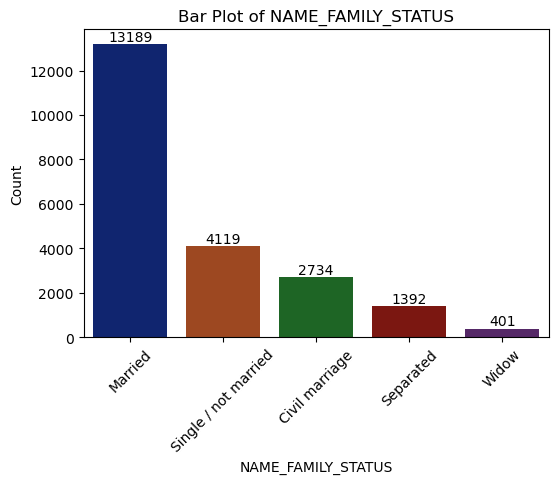

In [291]:
plot_bar(target1, "NAME_FAMILY_STATUS")

# Most of the applicants are married followed by single/not married

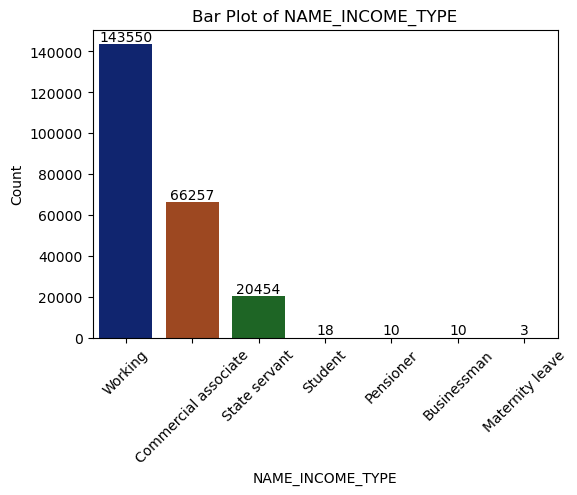

In [295]:
plot_bar(target0, "NAME_INCOME_TYPE")

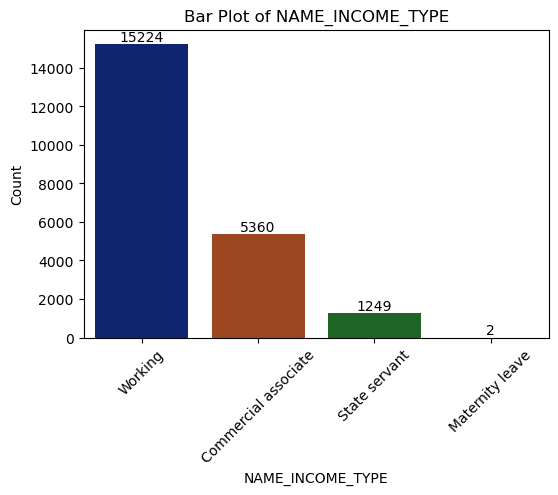

In [297]:
plot_bar(target1, "NAME_INCOME_TYPE")

# Most of the applicants are working. 

# Student, Businessman, and pensioner are not present in the target 1, hence even if their number is less they are safer applicants compared to the others.

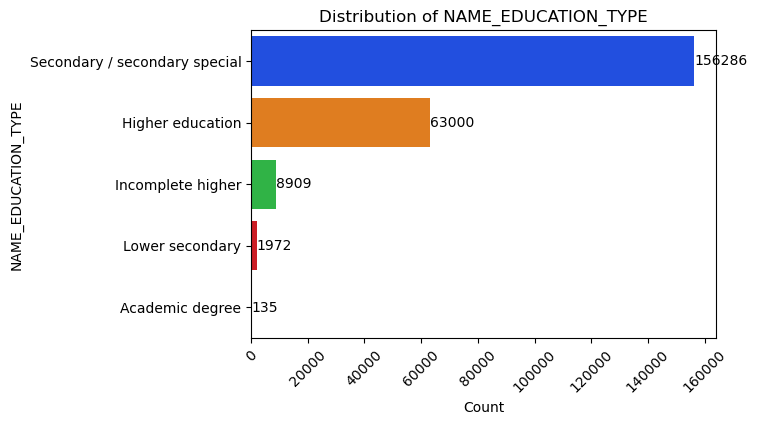

In [301]:
plot_barh(target0, "NAME_EDUCATION_TYPE")

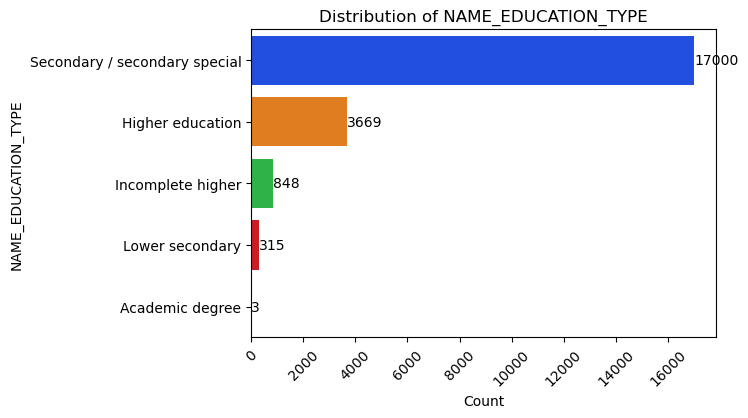

In [303]:
plot_barh(target1, "NAME_EDUCATION_TYPE")

# Most number of applicants have higher education.

# Applicants with academic degree are least likely to be defaulters. 

In [307]:
#we will cast the required columns in variable before moving forward.

cast_numeric=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df1[cast_numeric]=df1[cast_numeric].apply(pd.to_numeric)

# BIVARIATE ANALYSIS FOR TARGET 0 AND TARGET 1

In [310]:
#creating a logboxplot func for repeated usage

def create_log(data, x_col, y_col, hue_col=None, title=None, figsize=(16, 12), rotation=45):
    
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=x_col, y=y_col, hue=hue_col)
    plt.yscale('log')
    plt.xticks(rotation=rotation)
    if title:
        plt.title(title)
    plt.show()

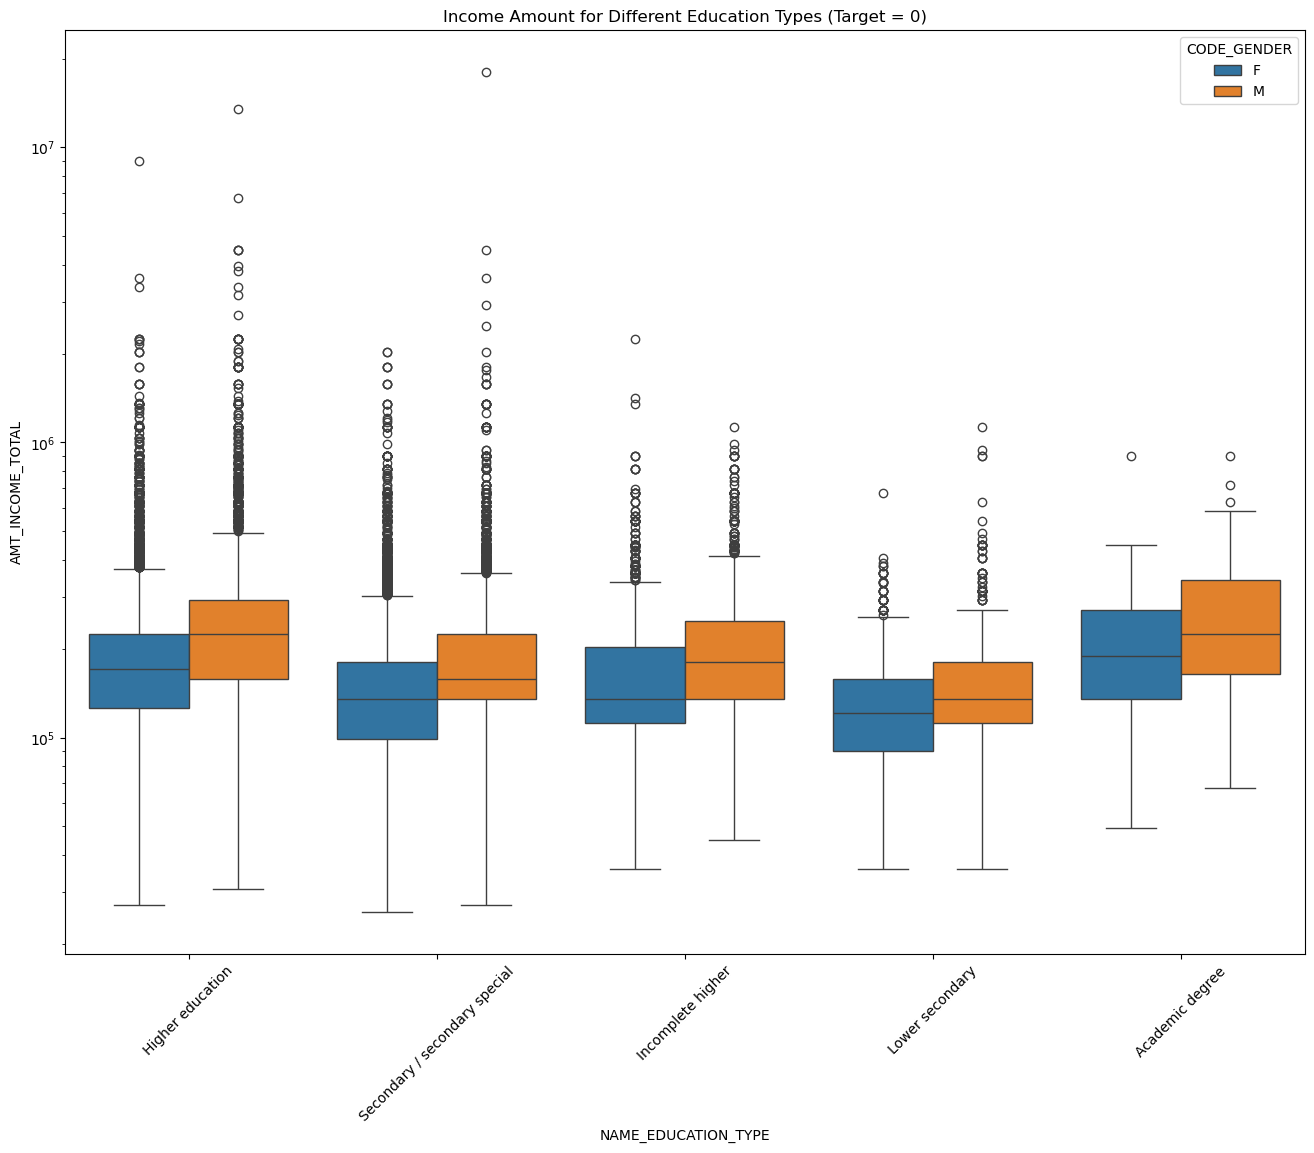

In [312]:
create_log(
    data=target0,
    x_col='NAME_EDUCATION_TYPE',
    y_col='AMT_INCOME_TOTAL',
    hue_col='CODE_GENDER',
    title='Income Amount for Different Education Types (Target = 0)'
)

# We can observe that most of the education levels appear to have similar median income levels.

# Higher Education and Secondary/secondary special categories show high number of outliers compared to other education level.

# Male applicants across all education levels appear to have higher income.

# Male applicants with academic degree have higher median income whereas Female applicants with lower secondary education appear to have lower median income compared to others.

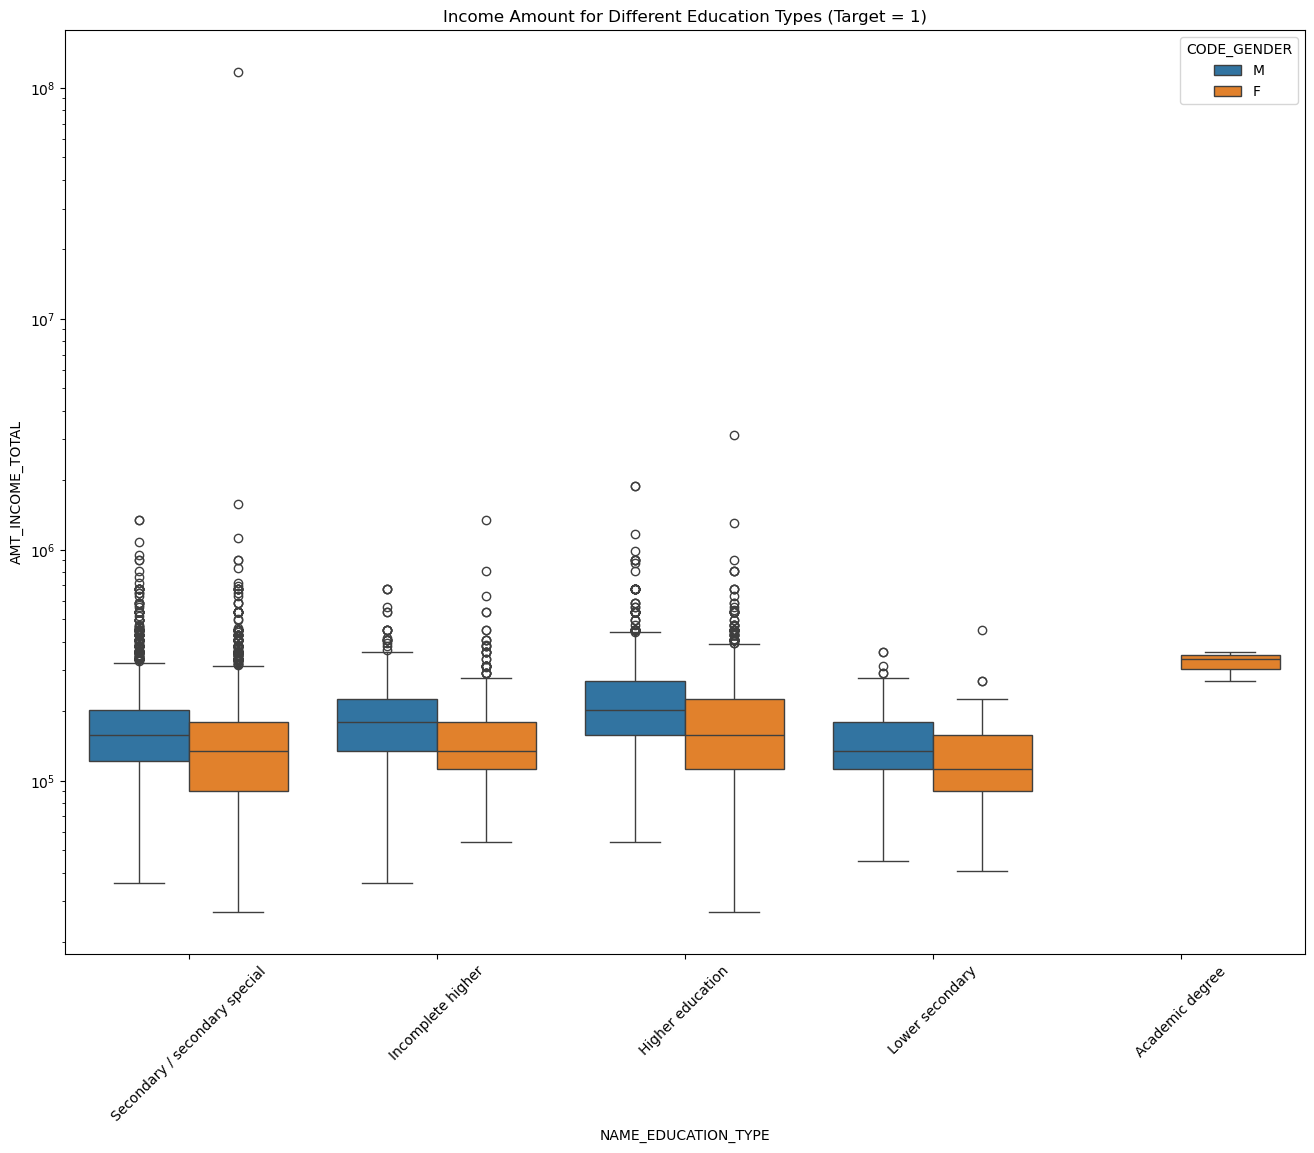

In [314]:
create_log(
    data=target1,
    x_col='NAME_EDUCATION_TYPE',
    y_col='AMT_INCOME_TOTAL',
    hue_col='CODE_GENDER',
    title='Income Amount for Different Education Types (Target = 1)'
)

# Applicants with lower secondary education appear to have lower income compared to others.

# There are large number of outliers especially among male applicants.

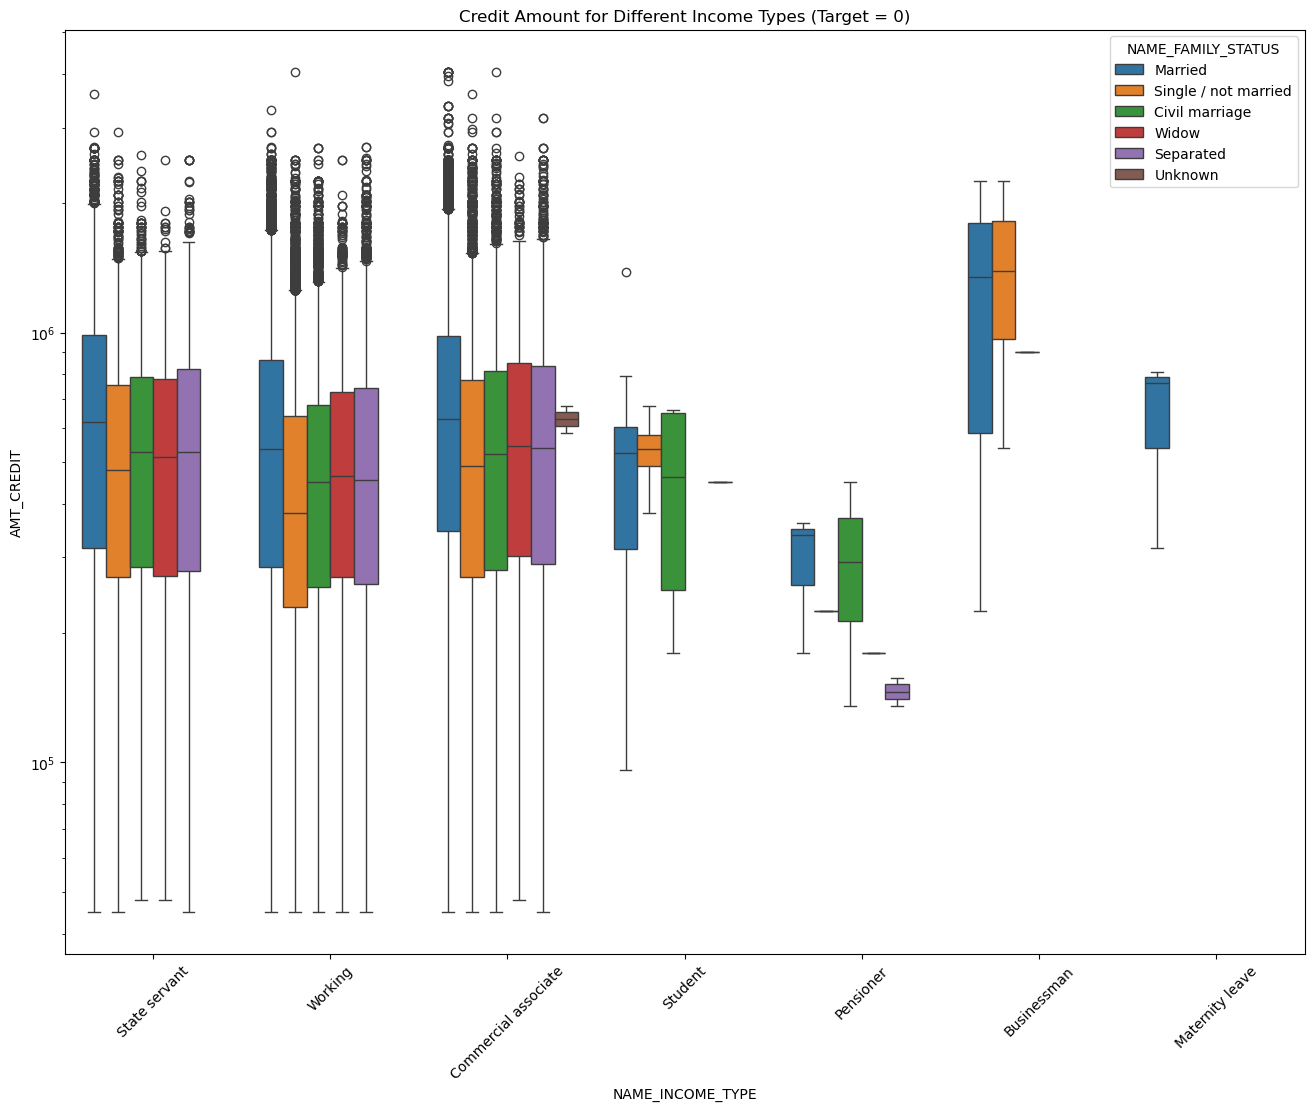

In [317]:
create_log(
    data=target0,
    x_col='NAME_INCOME_TYPE',
    y_col='AMT_CREDIT',
    hue_col='NAME_FAMILY_STATUS',
    title='Credit Amount for Different Income Types (Target = 0)'
)

# Most of the outliers lie in commercial associate income type. The credit amounts for Working and Commercial associate income types are relatively stable across different family statuses.

# Businessmen tend to apply for credit amounts compared to other income types.

# Pensioners and people on maternity leave tend to apply for lower credit amounts.


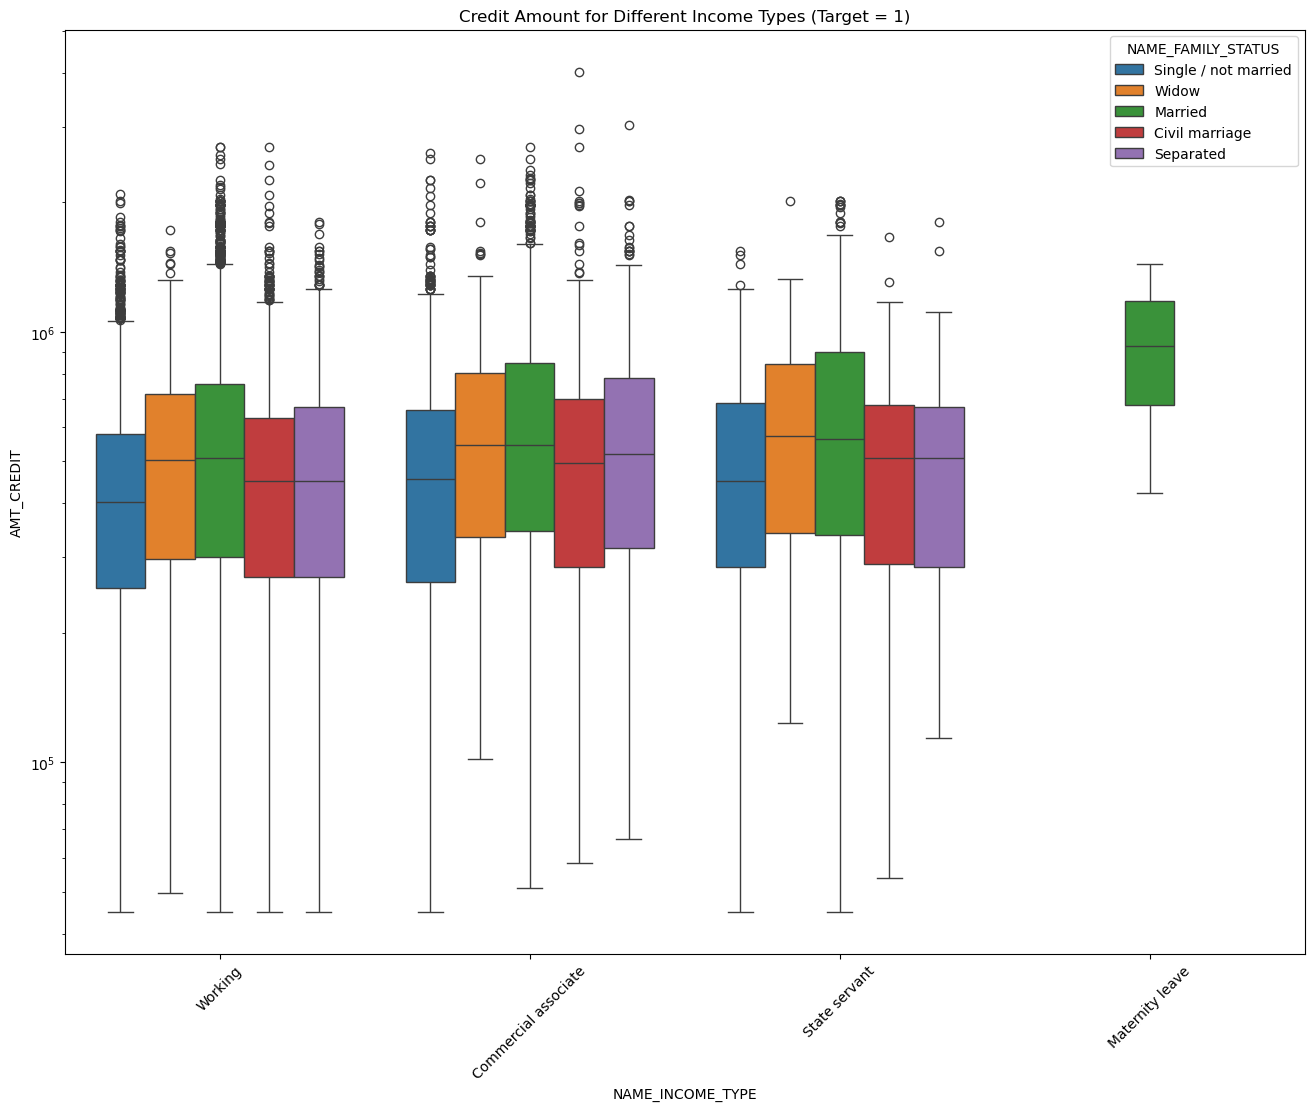

In [320]:
create_log(
    data=target1,
    x_col='NAME_INCOME_TYPE',
    y_col='AMT_CREDIT',
    hue_col='NAME_FAMILY_STATUS',
    title='Credit Amount for Different Income Types (Target = 1)'
)

# State servants tend to have higher credit amounts compared to other income types.

# Widows and separated individuals tend to apply for lower credit amounts across all income types.

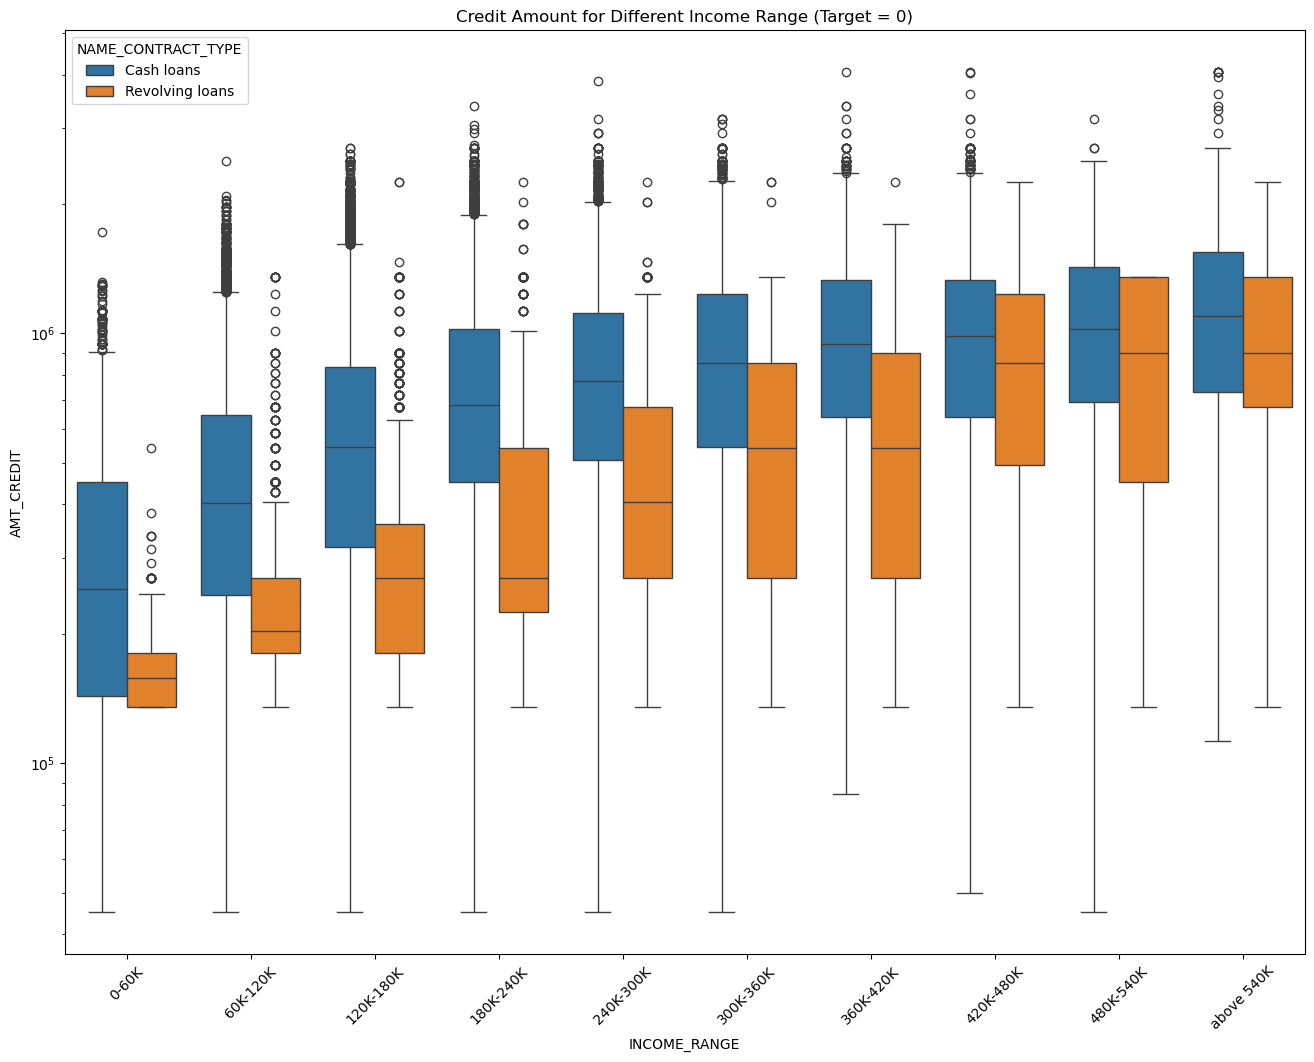

In [322]:
create_log(
    data=target0,
    x_col='INCOME_RANGE',
    y_col='AMT_CREDIT',
    hue_col='NAME_CONTRACT_TYPE',
    title='Credit Amount for Different Income Range (Target = 0)'
)

# Revolving loans show relatively stable credit amounts across different income ranges, making them less risky compared to Cash loans.
# Clients with higher incomes tend to apply for larger Cash loans.
# The income ranges of 0-60K and 60K-120K have the lowest credit amounts for both Cash and Revolving loans.

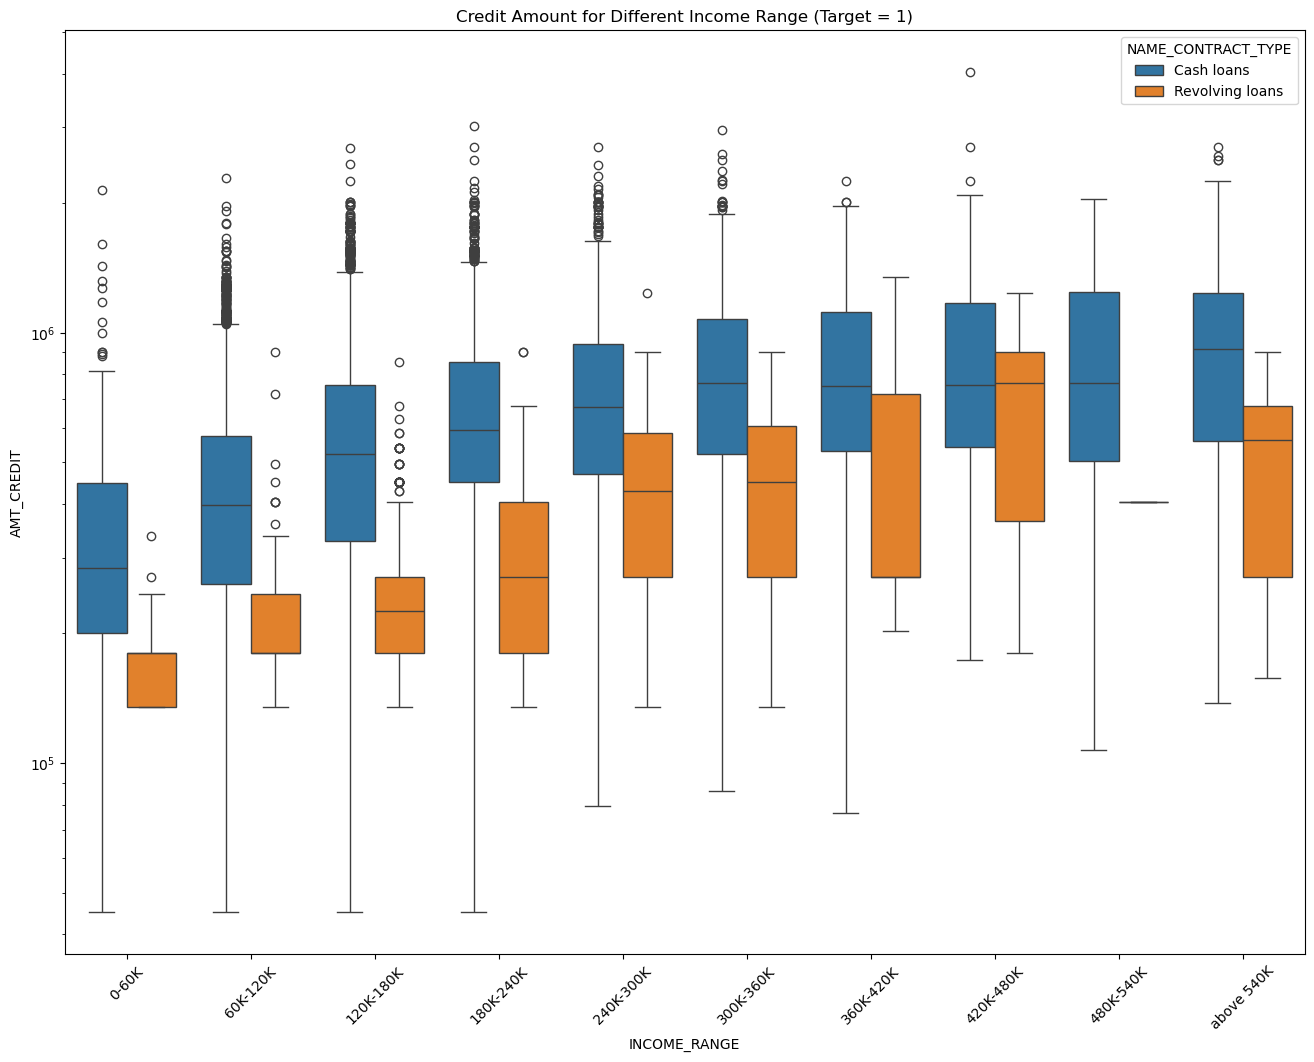

In [324]:
create_log(
    data=target1,
    x_col='INCOME_RANGE',
    y_col='AMT_CREDIT',
    hue_col='NAME_CONTRACT_TYPE',
    title='Credit Amount for Different Income Range (Target = 1)'
)

# The median credit amounts for Cash loans increase gradually for higher income ranges (e.g., above 300K), but they might still face payment difficulties.
# Cash loans generally have higher credit amounts compared to Revolving loans across all income ranges.

# Lets find top correlations for both target variables. 

In [330]:

target_0_numeric = target0.select_dtypes(include=['number'])
target_1_numeric = target1.select_dtypes(include=['number'])

target0_corr=target_0_numeric.iloc[0:,2:]
target1_corr=target_1_numeric.iloc[0:,2:]

target0_matrix=target0_corr.corr(method='spearman')
target1_matrix=target1_corr.corr(method='spearman')



In [331]:

def func_corr(data,title):
    plt.figure(figsize=(20, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()


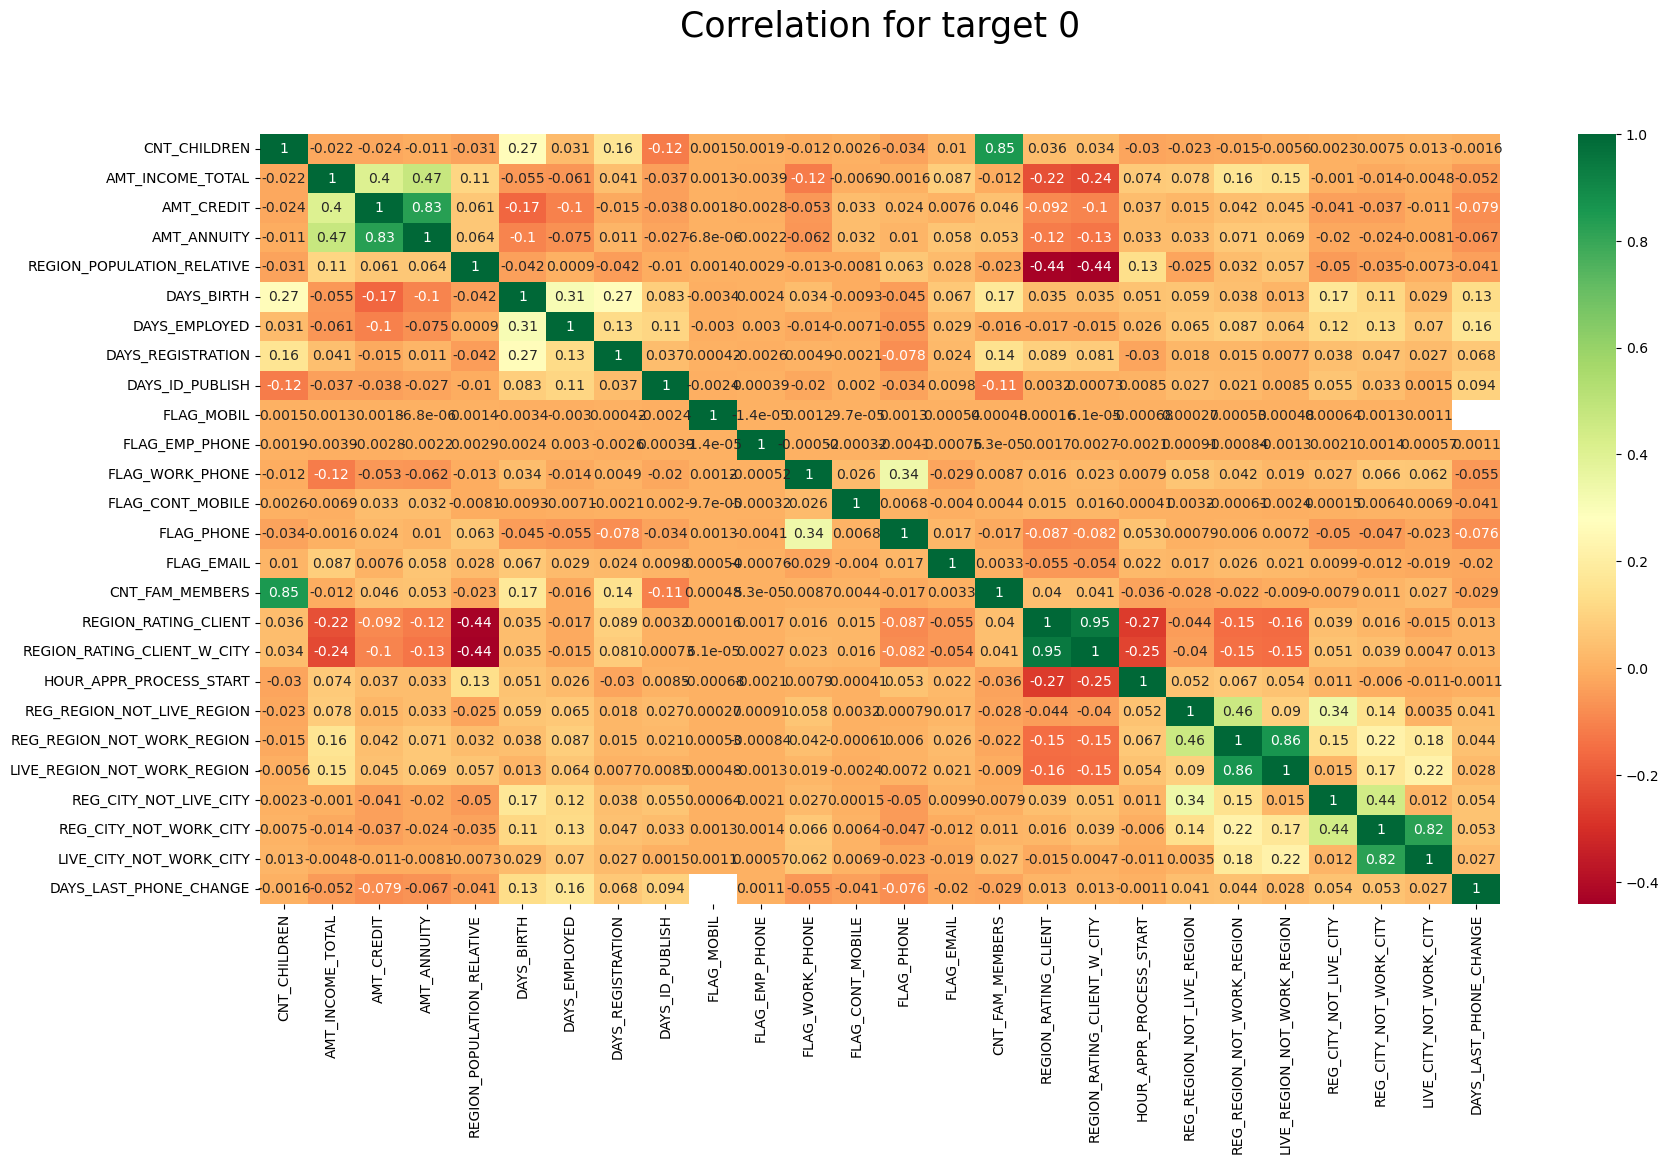

In [332]:
func_corr(data=target0_matrix,title='Correlation for target 0')

# Amount of credit is inversely proportional to the date of birth of applicant. 
# Total income amount is higher in areas with large population whereas amount of annuity is higher for high credit amount.
# Region rating for client is inversely proportional to the relative population of a region. It means higher the rating lower the population. 

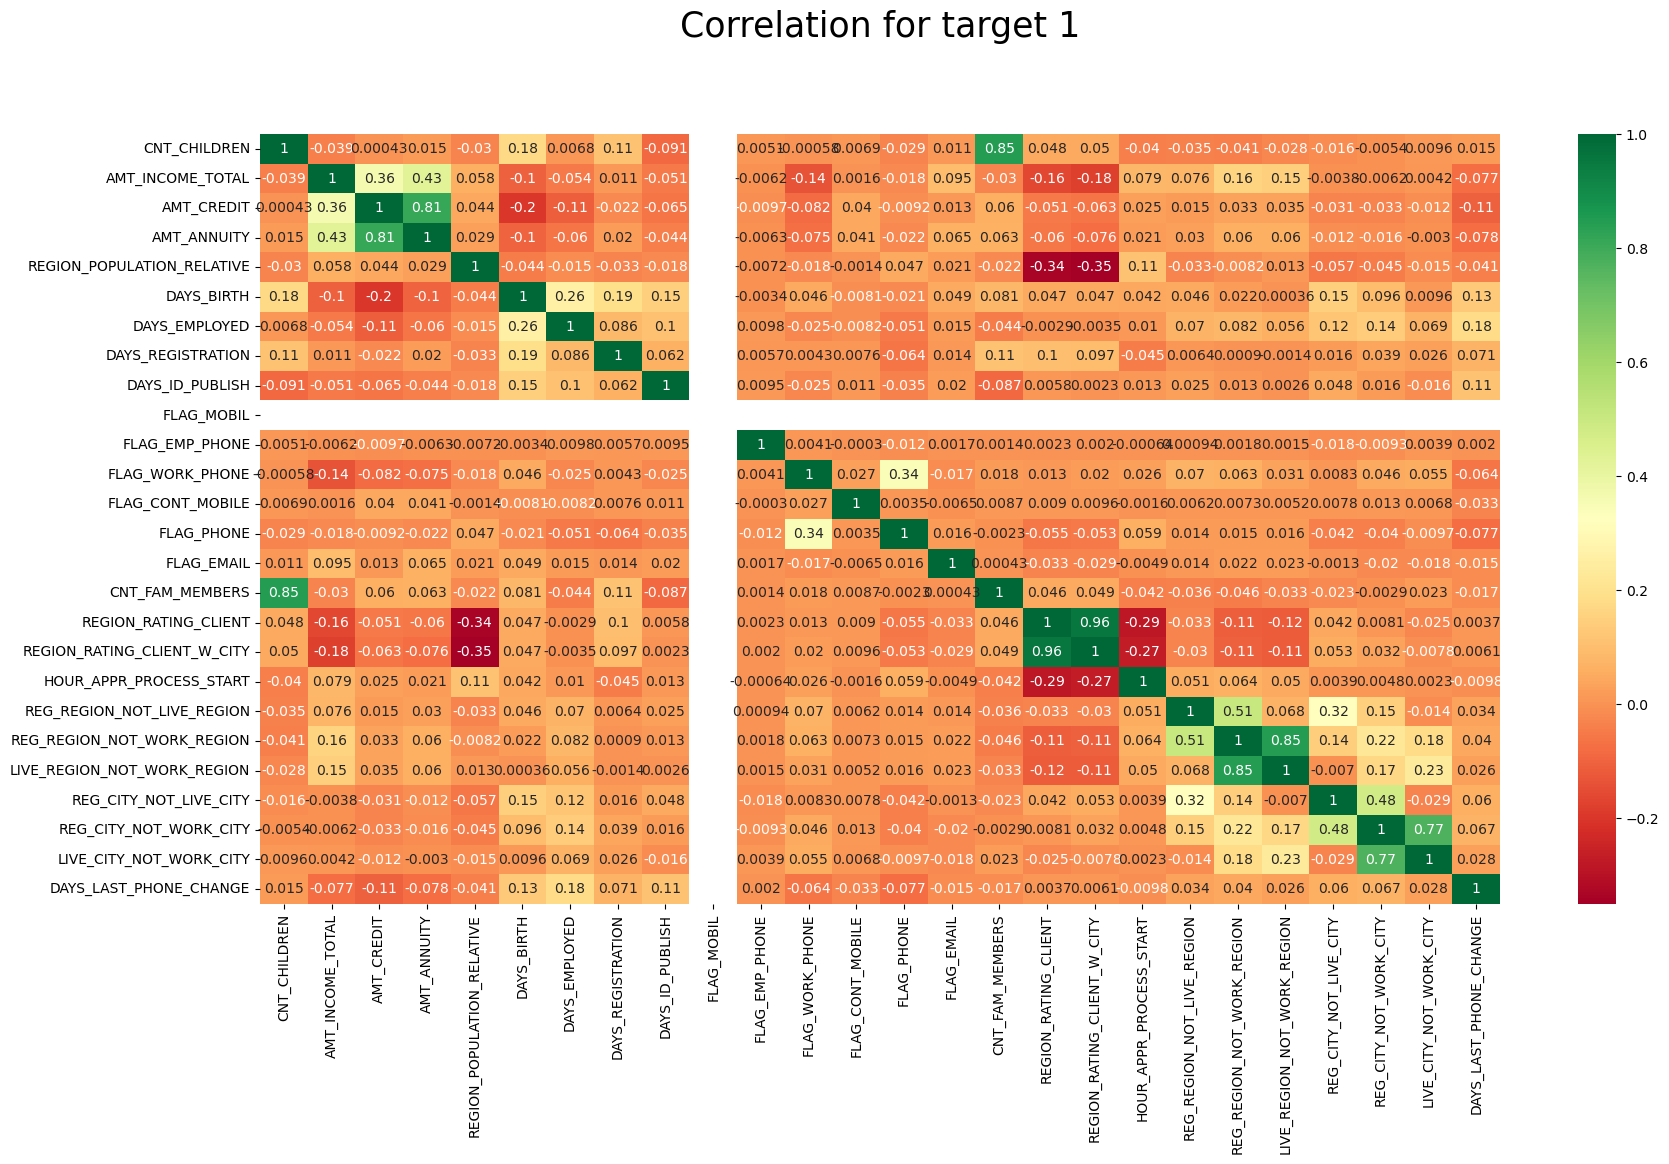

In [335]:
func_corr(data=target1_matrix,title='Correlation for target 1')

# Total income is inversely proportional to the region rating of client taking city into consideration. 
# Credit amount is directly proportional to the total amount of annuity and inversely proportional to the date of birth. 
# Region rating of a client is inversely proportional to the approx. hour since the process started. 

In [338]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low



# Now lets combine both application_data and previous_application for few common insights

In [340]:
df=pd.merge(left=df1,right=df2,how='inner',on='SK_ID_CURR',suffixes=('_x', '_y'))

In [341]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [342]:
#DIVIDING DATAESET AGAIN FOR BOTH TARGETS
df_target_0 = df[df['TARGET'] == 0]
df_target_1 = df[df['TARGET'] == 1]

In [343]:
def plot_category(df, x_column, hue_column, title, xlabel, ylabel):
   
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=x_column, hue=hue_column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale('log')
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
    plt.show()

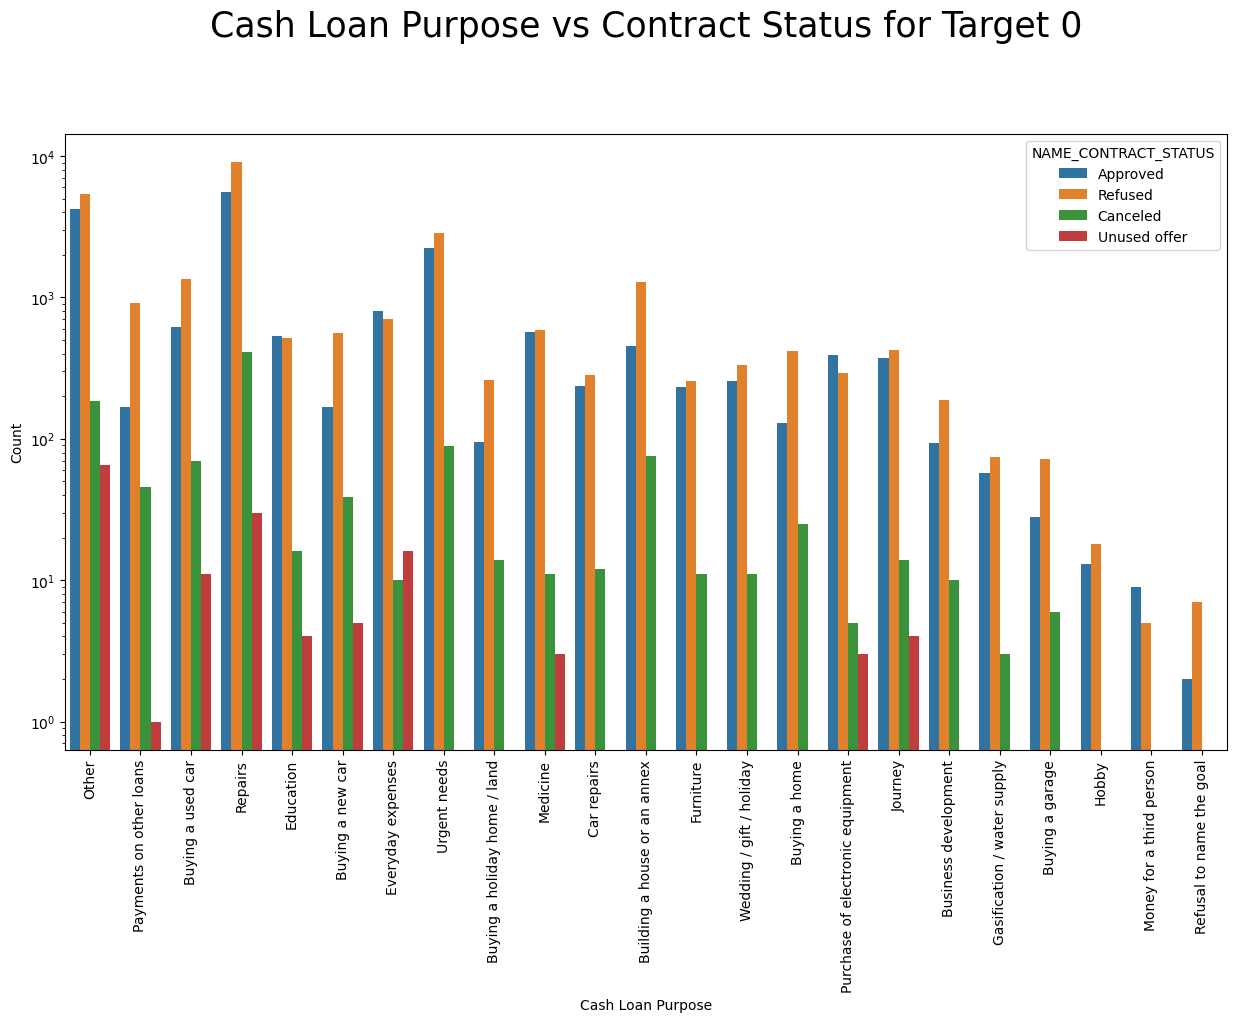

In [344]:
plot_category(df_target_0, 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
                       'Cash Loan Purpose vs Contract Status for Target 0', 'Cash Loan Purpose', 'Count')

# The category 'repairs' has a high count of refused loans and the least amount of approved loans are for 'refusal to name the goal'.
# 'Payment on other loans' have highest difference between refused vs approved. 
 

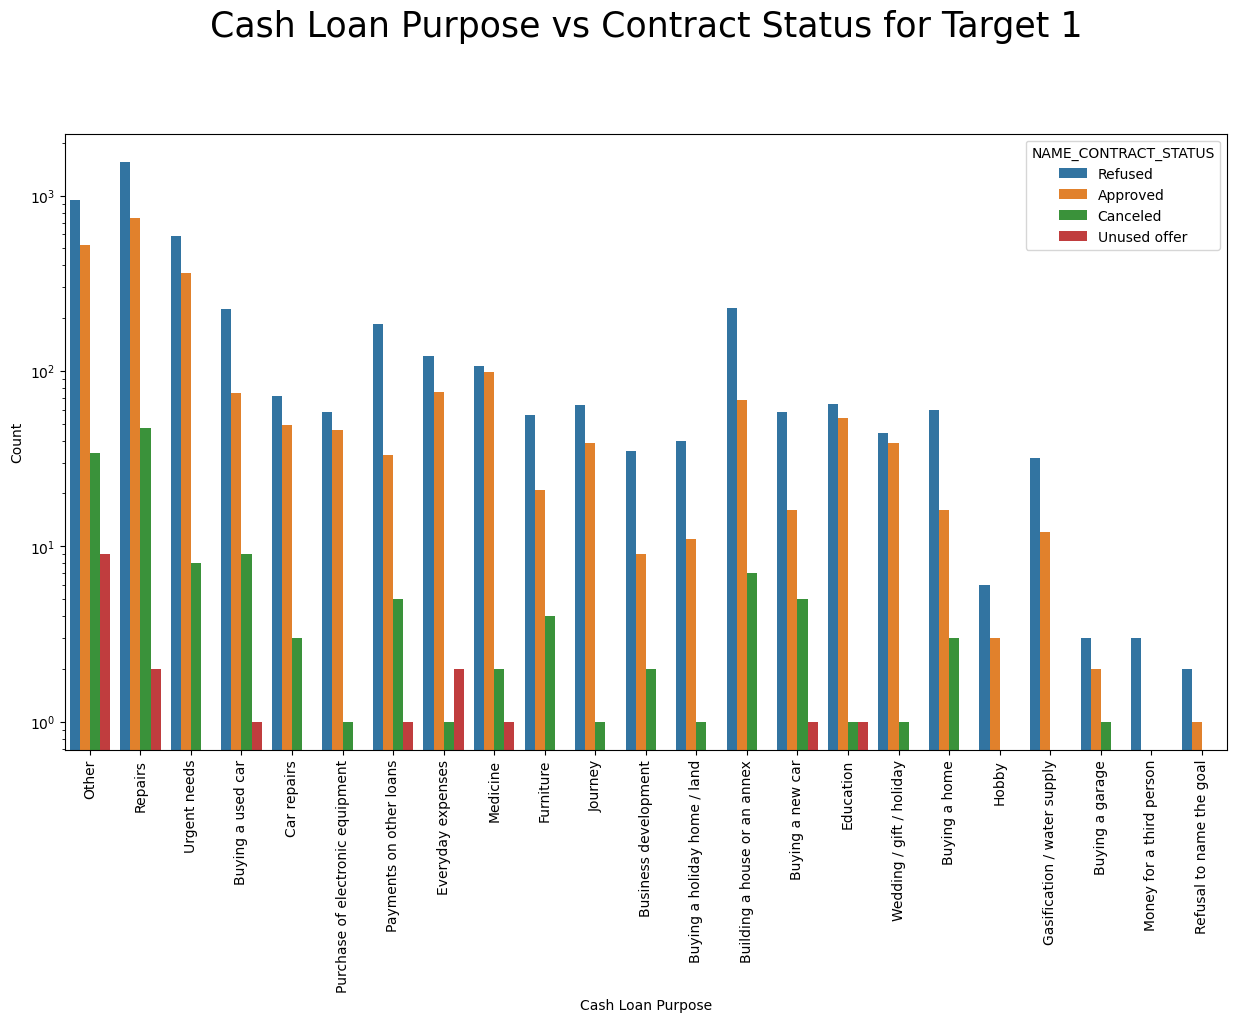

In [346]:
plot_category(df_target_1, 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
                       'Cash Loan Purpose vs Contract Status for Target 1', 'Cash Loan Purpose', 'Count')

# The number of potential defaulters are highest for repair.
# A high number of payment on other loans vs buying a holiday home/land seems to have been rejected by bank.

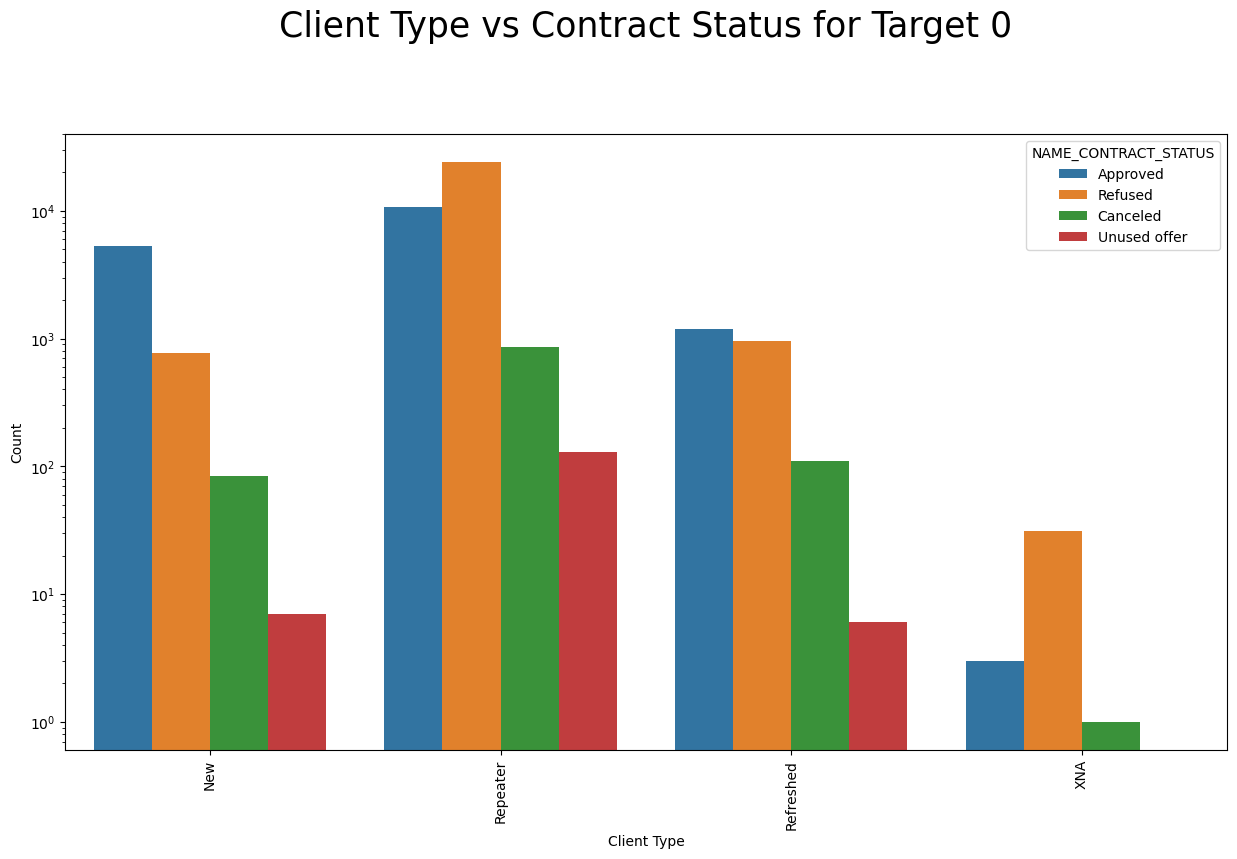

In [350]:
plot_category(df_target_0, 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS',
                       'Client Type vs Contract Status for Target 0', 'Client Type', 'Count')

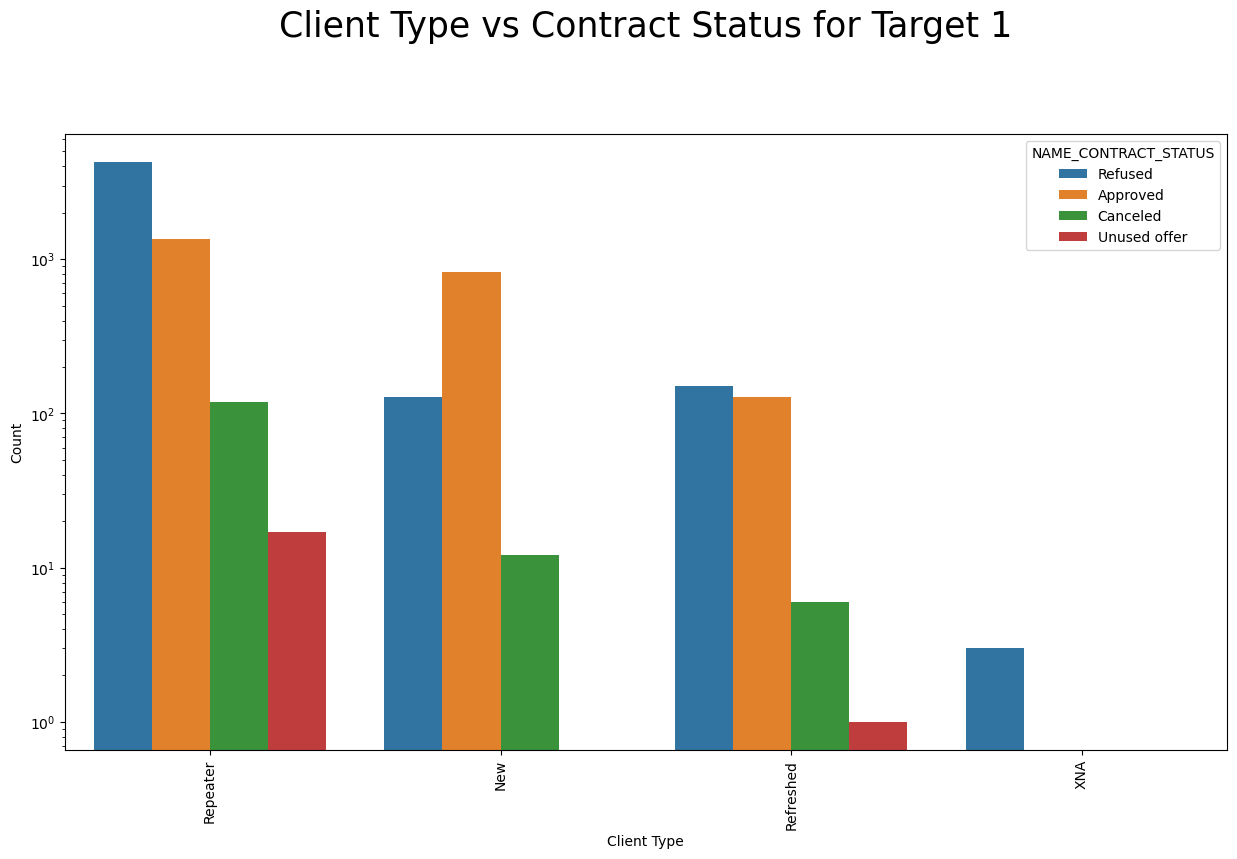

In [351]:
plot_category(df_target_1, 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS',
                       'Client Type vs Contract Status for Target 1', 'Client Type', 'Count')

# New clients have high amount of approved loans compared to repeaters.
# There is high difference between no of approved vs refused loans for new clients.
# There are large number of unused offers for repeaters for both target variables.

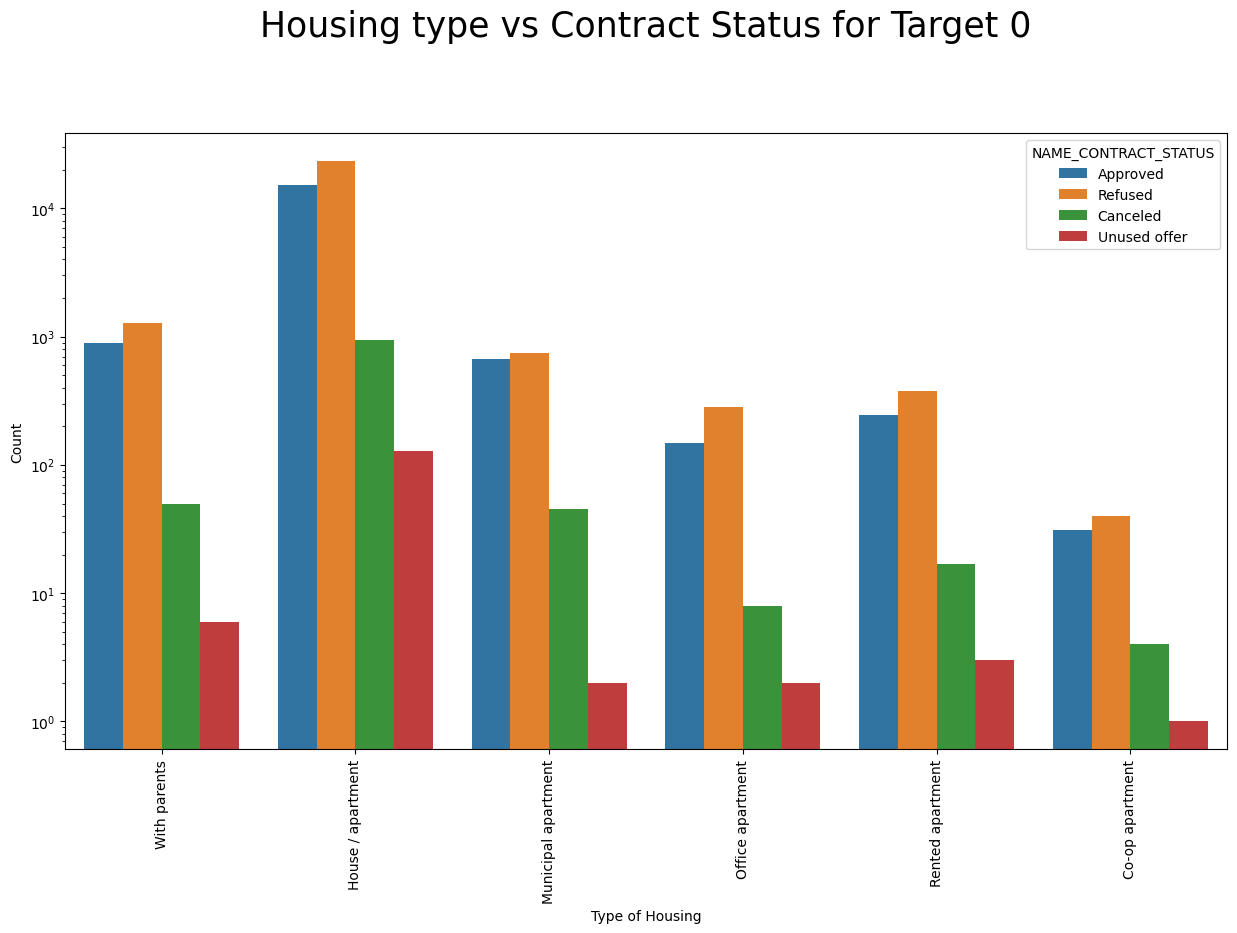

In [353]:
plot_category(df_target_0, 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_STATUS',
                       'Housing type vs Contract Status for Target 0', 'Type of Housing', 'Count')

# The house/apartment category has both highest number of approved loans as well as refused loans.
# Municipal apartment has the least difference between approved vs refused loans.

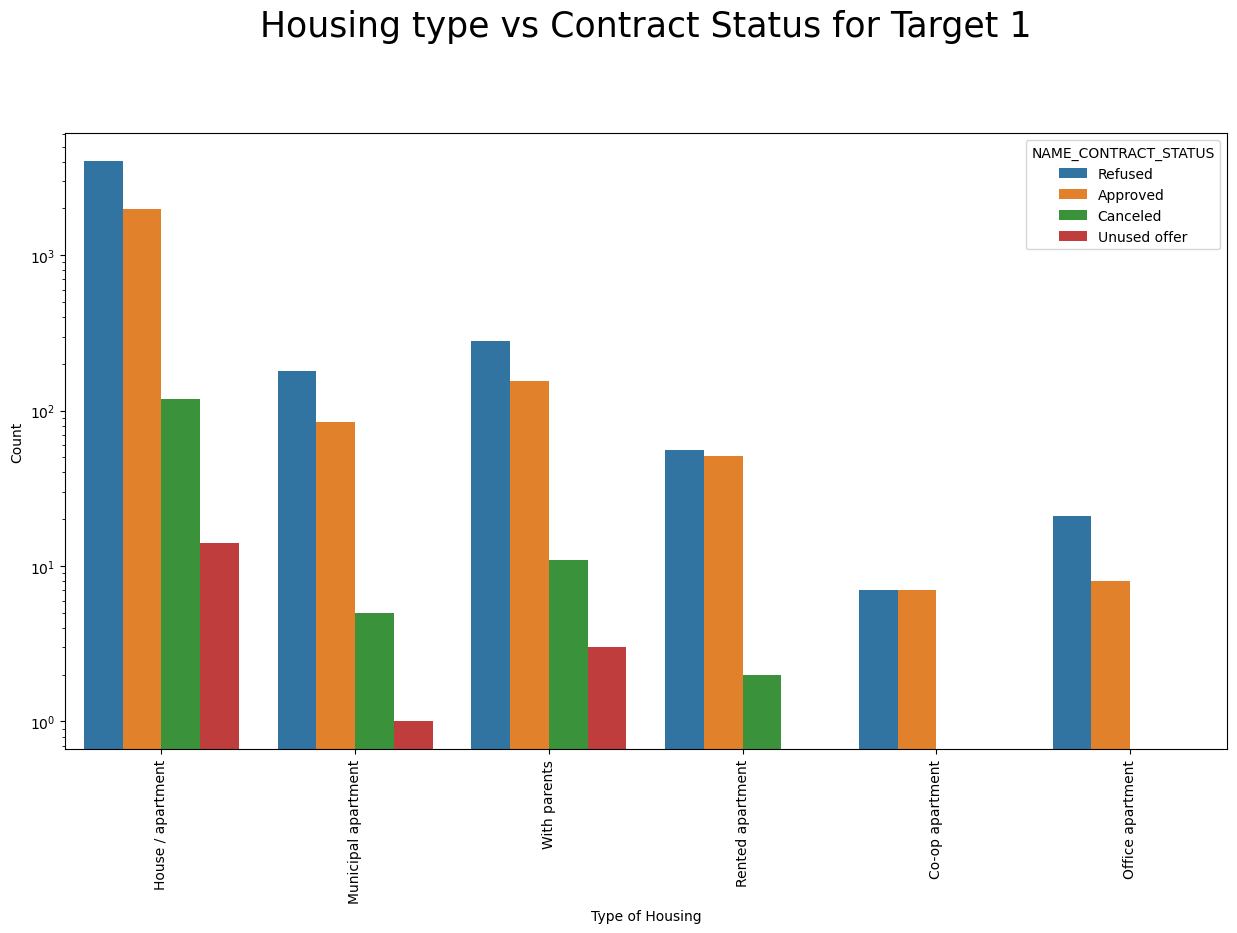

In [355]:
plot_category(df_target_1, 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_STATUS',
                       'Housing type vs Contract Status for Target 1', 'Type of Housing', 'Count')

# The house/apartment category has both highest number of approved loans as well as refused loans.
# The co-op apartment category has equal amount of approved vs refused loans.

# The house/apartment for both target variables have large amount of unused offers compared to other housing type.